Step 1: Load & Combine Data

In [1]:
import pandas as pd

# Load each cleaned CSV
benin = pd.read_csv('../data/data/benin-malanville.csv')
sierraleone = pd.read_csv('../data/data/sierraleone-bumbuna.csv')
togo = pd.read_csv('../data/data/togo-dapaong_qc.csv')

# Add country column
benin['Country'] = 'Benin'
sierraleone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine into a single DataFrame
df = pd.concat([benin, sierraleone, togo], ignore_index=True)
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Country
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN,Benin
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN,Benin
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN,Benin
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN,Benin
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN,Benin


Step 2: Boxplots of GHI, DNI, DHI

C:\Users\try\AppData\Local\Temp\ipykernel_16444\4072932930.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df, palette='Set3')


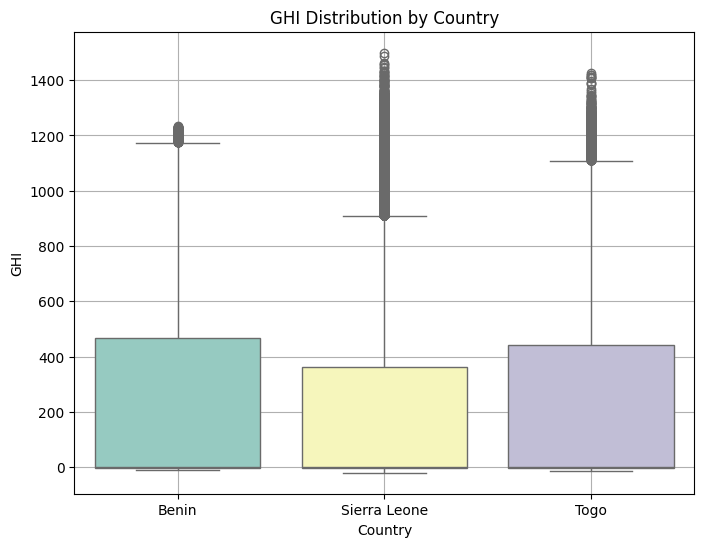

C:\Users\try\AppData\Local\Temp\ipykernel_16444\4072932930.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df, palette='Set3')


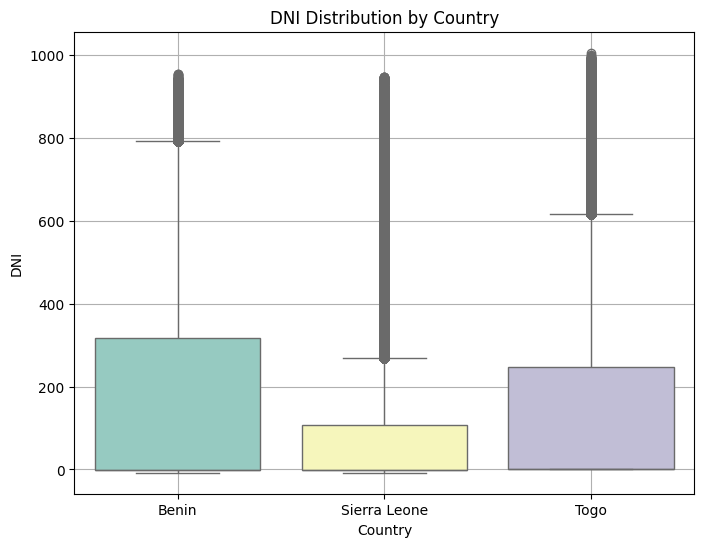

C:\Users\try\AppData\Local\Temp\ipykernel_16444\4072932930.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df, palette='Set3')


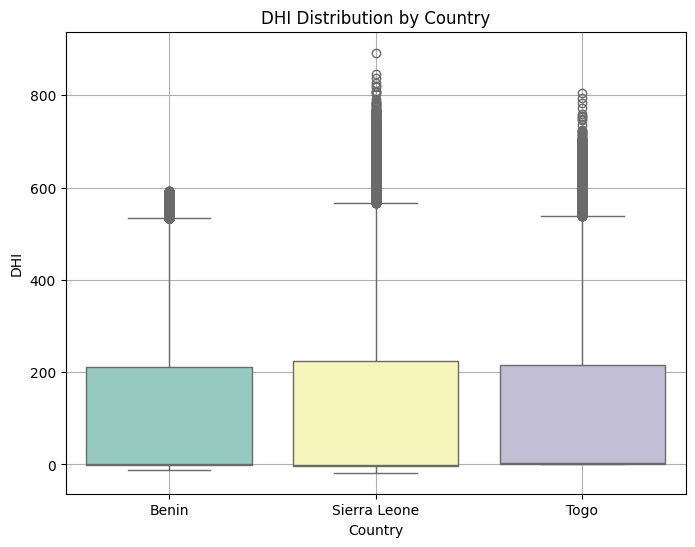

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ['GHI', 'DNI', 'DHI']  # make sure these columns exist

for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Country', y=metric, data=df, palette='Set3')
    plt.title(f'{metric} Distribution by Country')
    plt.ylabel(metric)
    plt.xlabel('Country')
    plt.grid(True)
    plt.show()


Step 3: Summary Table

In [3]:
summary = df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary.columns = ['_'.join(col).strip() for col in summary.columns.values]
summary


,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
Country,,,,,,,,,
Benin,236.23,0.7,328.29,166.90,-0.1,262.08,111.66,0.5,153.10
Sierra Leone,201.96,0.3,298.50,116.38,-0.1,218.65,113.72,-0.1,158.95
Togo,230.56,2.1,322.53,151.26,0.0,250.96,116.44,2.5,156.52


Step 4: ANOVA or Kruskal–Wallis

In [4]:
from scipy.stats import f_oneway, kruskal

ghi_benin = benin['GHI'].dropna()
ghi_sierraleone = sierraleone['GHI'].dropna()
ghi_togo = togo['GHI'].dropna()

# ANOVA
anova = f_oneway(ghi_benin, ghi_sierraleone, ghi_togo)
print(f"ANOVA p-value (GHI): {anova.pvalue:.4f}")

# Optional: Kruskal-Wallis
kruskal_test = kruskal(ghi_benin, ghi_sierraleone, ghi_togo)
print(f"Kruskal-Wallis p-value (GHI): {kruskal_test.pvalue:.4f}")


ANOVA p-value (GHI): 0.0000
Kruskal-Wallis p-value (GHI): 0.0000


Step 5: Average GHI Bar Plot

C:\Users\try\AppData\Local\Temp\ipykernel_16444\917692275.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette='crest')


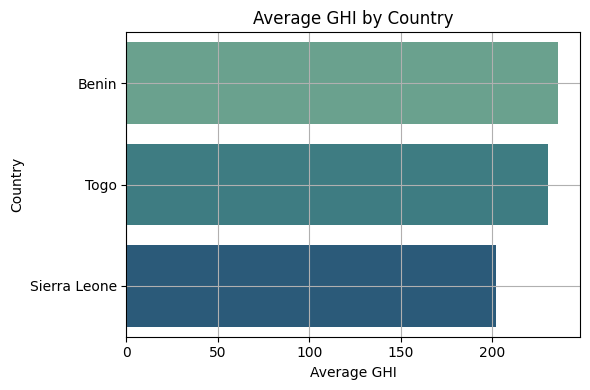

In [5]:
avg_ghi = df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette='crest')
plt.xlabel('Average GHI')
plt.title('Average GHI by Country')
plt.grid(True)
plt.tight_layout()
plt.show()


Step 6: Markdown Summary 
### Key Observations

- [Country] exhibits the **highest average GHI**, showing promise for solar energy deployment.
- [Country] displays **lowest variability** in GHI, suggesting consistent solar availability.
- Significant differences in GHI across countries were observed (p-value < 0.05), as confirmed by ANOVA/Kruskal-Wallis tests.


 Bonus: Visual Summary (Bar Chart by Average GHI)

C:\Users\try\AppData\Local\Temp\ipykernel_16444\1731628307.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette='viridis')


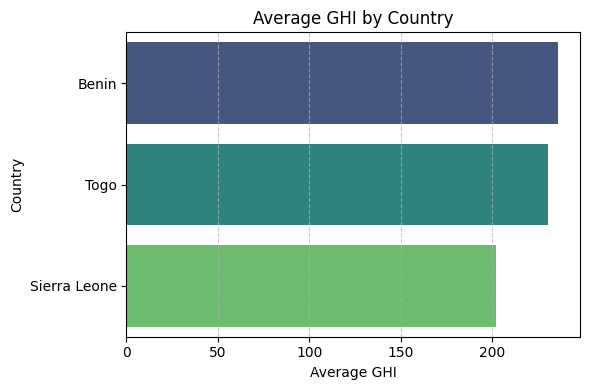

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute average GHI per country
avg_ghi = df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

# Plot horizontal bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette='viridis')

# Add labels
plt.title('Average GHI by Country')
plt.xlabel('Average GHI')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
